In [109]:
        #encryption part
#---------------------------------->

 




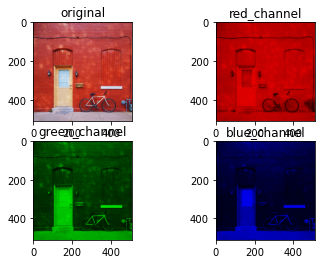

In [110]:

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import time
import cv2
from copy import deepcopy
import os

# directory = "F:/Thesis/"
# filename = "bruno.png"
# #lena = Image.open(os.path.join(directory, filename))
lena = io.imread('F:/Thesis/wall.png')
red_channel= deepcopy(lena)
green_channel=deepcopy(lena)
blue_channel=deepcopy(lena)

red_channel[:,:,1]=0
red_channel[:,:,2]=0

green_channel[:,:,0]=0
green_channel[:,:,2]=0

blue_channel[:,:,0]=0
blue_channel[:,:,1]=0

fig, ax=plt.subplots(ncols=2,nrows=2)

ax[0,0].imshow(lena)
ax[0,0].set_title('original')


ax[0,1].imshow(red_channel)
ax[0,1].set_title('red_channel')


ax[1,0].imshow(green_channel)
ax[1,0].set_title('green_channel')


ax[1,1].imshow(blue_channel)
ax[1,1].set_title('blue_channel')


plt.show()







In [111]:
import numpy as np
start = time.time()
# # Create a 3D array of shape (height, width, 3) representing an RGB image
# image = np.random.randint(0, 256, (100, 100, 3))

# Split the 3D array into separate 2D arrays for each color component
red = lena[:, :, 0]
green = lena[:, :, 1]
blue = lena[:, :, 2]




 
# # Print the matrices
# print('original')
# print(lena)
# print("Red matrix:")
# print(red)

# print("Green matrix:")
# print(green)

# print("Blue matrix:")
# print(blue)
# print(len(red))

In [112]:
def tuple_to_array(tuple_2d):
    array_2d = []
    for sub_tuple in tuple_2d:
        array_2d.append(list(sub_tuple))
    return array_2d

 
red_2d = tuple_to_array(red)
green_2d = tuple_to_array(green)
blue_2d = tuple_to_array(blue)
print(type(blue_2d))


<class 'list'>


In [113]:
 
# # Define the chaotic map function
# def piecewise_linear_map(xn, m):
#     if 0 <= xn < m:
#         return xn/m
#     elif m <= xn < 0.5:
#         return (xn-m)/(0.5-m)
#     elif 0.5 < xn < 1-m:
#         return (1-m-xn)/(0.5-m)
#     else:
#         return (1-xn)/m

    

# delta_h = (0.9 - 0.1) / 256
# intervals = [0.1 + i * delta_h for i in range(256)]
# intervals.append(0.9)
# # print(intervals)


# def createSbox(xn, m):
#     S = []
#     while len(S) < 256:
#         xn = piecewise_linear_map(xn, m)
#         for i, interval in enumerate(intervals[:-1]):
#             if interval <= xn < intervals[i+1]:
#                 if i not in S:
#                     S.append(i)
#                 break
#     return S


# print('s box for component')
# S = createSbox(0.76,0.15)
# # print(S[6])
# print(S)


# print(S_red[210])
# print(red_matrix[2][1])
# print(S_red)
# print('s box for green')
# S_green=createSbox(0.6,0.3)
# print(S_green)
# print('s box for blue')
# S_blue=createSbox(0.45,0.1)
# print(S_blue)
 
# print(type(S))




#------------------


import numpy as np
import random
import math

# def logistic_map(x, r):
#     return r * x * (1 - x)
def piecewise_linear_map(xn, m):
    if 0 <= xn < m:
        return xn/m
    elif m <= xn < 0.5:
        return (xn-m)/(0.5-m)
    elif 0.5 < xn < 1-m:
        return (1-m-xn)/(0.5-m)
    else:
        return (1-xn)/m
def initial_sbox_generation(m):
    sbox = []
    x = 0.76
    for i in range(256):
        x = piecewise_linear_map(x, m)
        sbox.append(int(round(x * 256)))
    return sbox


def gray_wolf_optimization(sbox, max_iterations):
    best_position = np.zeros(256)
    best_position = np.around(best_position).astype(int)
    for i in range(max_iterations):
        for j in range(256):
            random_position = random.randint(0, 255)
            obj_value = sbox[j]
            if obj_value > best_position[j]:
                best_position[j] = obj_value
        sorted_indices = np.argsort(best_position)[::-1][:256]
    return sorted_indices


def generate_sbox(m, max_iterations):
    sbox = initial_sbox_generation(m)
    final_sbox = []
    unique_values = 0
    while unique_values < 256:
        current_iteration_sbox = gray_wolf_optimization(sbox, max_iterations)
        for value in current_iteration_sbox:
            if value not in final_sbox and unique_values < 256:
                final_sbox.append(value)
                unique_values += 1
    return final_sbox



# Example usage
S = generate_sbox(0.15, 2000)
print(S)

[226, 74, 26, 28, 186, 128, 146, 33, 168, 22, 116, 198, 206, 69, 7, 142, 189, 172, 135, 220, 196, 140, 175, 82, 251, 209, 214, 222, 110, 154, 86, 132, 57, 78, 202, 137, 138, 20, 166, 201, 174, 109, 139, 167, 185, 21, 3, 203, 157, 89, 60, 163, 79, 58, 84, 52, 63, 97, 47, 43, 119, 13, 177, 239, 191, 93, 247, 231, 113, 151, 236, 9, 11, 254, 107, 144, 31, 224, 72, 133, 218, 212, 87, 183, 155, 50, 111, 234, 252, 210, 216, 215, 211, 217, 223, 71, 106, 253, 235, 112, 150, 238, 176, 46, 83, 51, 88, 156, 184, 153, 213, 81, 219, 134, 6, 141, 115, 25, 73, 225, 32, 145, 197, 171, 195, 221, 208, 250, 77, 56, 108, 19, 173, 200, 165, 136, 255, 2, 62, 96, 42, 118, 12, 190, 92, 230, 8, 10, 143, 182, 233, 105, 70, 149, 237, 152, 114, 24, 194, 170, 249, 207, 199, 76, 1, 41, 95, 91, 117, 232, 148, 23, 193, 169, 0, 248, 40, 94, 147, 192, 39, 38, 36, 37, 34, 35, 124, 100, 159, 14, 178, 101, 240, 160, 129, 125, 102, 179, 241, 120, 15, 187, 126, 130, 161, 29, 48, 44, 180, 228, 103, 64, 98, 66, 242, 244, 121, 

In [114]:

 
def replace_values(arr2D, arr1D):
    
    num_rows = len(arr2D)
    num_columns = len(arr2D[0])

     
    
    for i in range(0,num_rows):
        for j in range(0,num_columns):
            value1=arr2D[i][j]
            value2=arr1D[value1]
#             print(value2)
            arr2D[i][j] = value2
        
    return arr2D


red_matrix_1 = replace_values(red_2d,S)
green_matrix_1=replace_values(green_2d,S)
blue_matrix_1=replace_values(blue_2d,S)
# print(blue_2d)


print(type(red_2d))
 


<class 'list'>


In [115]:
 
 # Convert list to 1D numpy array
arr1 = np.array(red_matrix_1)
arr2=np.array(green_matrix_1)
arr3=np.array(blue_matrix_1)

# Number of rows and columns
rows =  len(arr1)
cols =  len(arr1[0])

# Convert 1D array to 2D array
arr_red = arr1.reshape(rows, cols)
arr_green= arr2.reshape(rows,cols)
arr_blue=arr3.reshape(rows,cols)
# print('2d red')
# print(arr_red)
# print('2d green')
# print(arr_green)

# print('2d blue')
# print(arr_blue)

 

In [116]:

def tent_map_mu(x, mu):
    if x < 0.5:
        return (4*(9-mu)*x*(1-x))/9 + (2*mu*x)/9
    else:
        return (4*(9-mu)*x*(1-x))/9 + (2*mu*(1-x))/9
    


def tent_logistic_system_mu(x_0, mu, n):
    x = x_0
    values = []
    for i in range(L-n):
        x = tent_map_mu(x, mu)
        y = int(x * 10**14)% 256
        values.append(y)
    return np.array(values)   
     

# x_0 = 0.1  # initial value
# mu = 3.8  # parameter value
# n = 88  # number of iterations
L=600


 


random_seq_1=tent_logistic_system_mu(0.1,3.8,88)
# print('random seq for red component')
# print(random_seq_1)


random_seq_2=tent_logistic_system_mu(0.2,4.2,88)
# print('random seq for green component')
# print(random_seq_2)



random_seq_3=tent_logistic_system_mu(0.16,3.1,88)
# print('random seq for blue component')
# print(random_seq_3)

In [117]:

red_matrix_1_1D=np.array(arr_red).flatten()
# print(red_matrix_1_1D)

green_matrix_1_1D=np.array(arr_green).flatten()
# print(green_matrix_1_1D)

blue_matrix_1_1D=np.array(arr_blue).flatten()
# print(type(blue_matrix_1_1D))
# print(blue_matrix_1_1D.tolist())

In [118]:
def xor_matrices(seq, comp):
    result = []
    num_rows = comp.shape[0]
    seq_length = len(seq)
    for i in range(len(comp)):
        result.append(seq[i%seq_length] ^ comp[i])
    return result


xored_red_matrix_2_1D =xor_matrices(random_seq_1,red_matrix_1_1D)   
# print('xored_red_matrix_2_1D')
# print(xored_red_matrix_2_1D )


 

xored_green_matrix_2_1D =xor_matrices(random_seq_2,green_matrix_1_1D) 
# print('xored_green_matrix_2_1D')
# print(xored_green_matrix_2_1D )



 
xored_blue_matrix_2_1D =xor_matrices(random_seq_3,blue_matrix_1_1D) 
print('xored_blue_matrix_2_1D')
# print(xored_blue_matrix_2_1D )


xored_blue_matrix_2_1D


In [119]:
  



import math

length = len(xored_red_matrix_2_1D)
rows = int(math.sqrt(length))
cols = int(math.sqrt(length))
arr_red_1 = np.array(xored_red_matrix_2_1D).reshape(rows, cols)
arr_green_1 = np.array(xored_green_matrix_2_1D).reshape(rows, cols)
arr_blue_1 = np.array(xored_blue_matrix_2_1D).reshape(rows, cols)

 

In [120]:
#repeated xor between each componenet
#-------------------------------------
repeatedXored_red=np.bitwise_xor(arr_red_1, np.bitwise_xor(arr_green_1, arr_blue_1))

# print('repeated xored red')
# print(repeatedXored_red)


repeatedXored_green=np.bitwise_xor( arr_green_1, arr_blue_1)
# print('repeated xored green')
# print(repeatedXored_green)

repeatedXored_blue=np.bitwise_xor( arr_red_1,  arr_blue_1)
# print('repeated xored blue')
# print(repeatedXored_blue)

# print(max(repeatedXored_green))
# print(min(repeatedXored_green))
# print('------------------------')
# print(repeatedXored_blue.tolist())

# print(type(repeatedXored_red))


In [121]:
 
# Number of rows and columns
rows = repeatedXored_red.shape[0]
cols = repeatedXored_red.shape[0]

# Convert 1D array to 2D array
arr_2d_red = repeatedXored_red.reshape(rows, cols)
arr_2d_green= repeatedXored_green.reshape(rows,cols)
arr_2d_blue=repeatedXored_blue.reshape(rows,cols)
# print('2d red')
# print(arr_2d_red)
# print('2d green')
# print(arr_2d_green)

# print('2d blue')
# print(arr_2d_blue)



 

In [122]:
print(repeatedXored_red.shape[0])

512


In [123]:
#cipher image


cipher_image= np.stack([arr_2d_red, arr_2d_green, arr_2d_blue], axis=2)
# print(cipher_image)


In [124]:
# Convert array to image
from PIL import Image
encrypted_lena_img = Image.fromarray(cipher_image.astype('uint8'), 'RGB')

# Save image
encrypted_lena_img.save("F:/Thesis/cipher_wall.png")


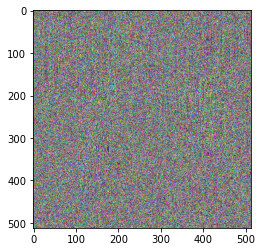

In [125]:
plt.imshow(encrypted_lena_img)
plt.show()

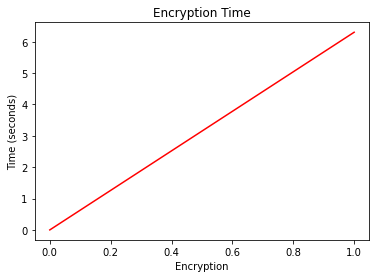

In [126]:
end = time.time()

total_time = end - start

# Plot time using Matplotlib
plt.plot([0, 1], [0, total_time], 'r')
plt.xlabel('Encryption')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time')
plt.show()

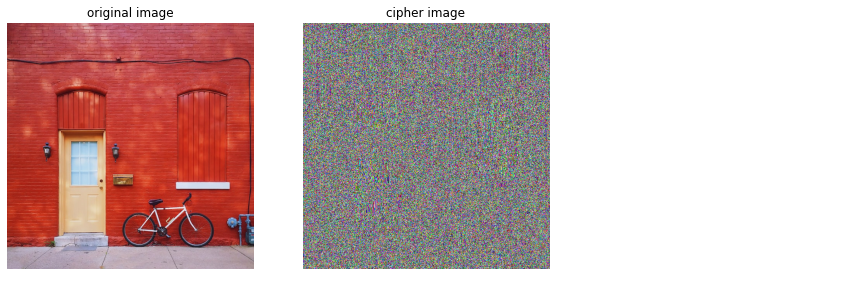

In [127]:


# Load images
img1 = cv2.imread("lena.png")
img2 = cv2.imread("image2.png")
# img3 = cv2.imread("image3.png")

# Create a subplot for each image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(lena)
axs[1].imshow(encrypted_lena_img)
# axs[2].imshow(lena)

# Add title to each subplot
axs[0].set_title("original image")
axs[1].set_title("cipher image")
# axs[2].set_title("decrypted image")

# Remove axis labels
for ax in axs:
    ax.axis("off")

# Display the images
plt.show()


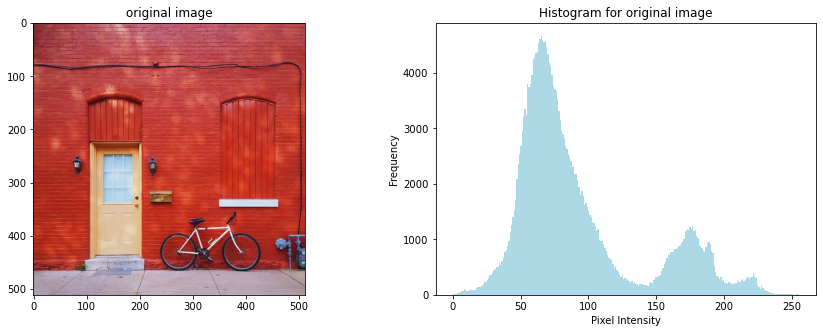

In [128]:
 

gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)



fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(lena)
axs[0].set_title('original image')
axs[1].hist(gray.ravel(), bins=256, range=(0, 255), color='lightblue')
axs[1].set_title("Histogram for original image")

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


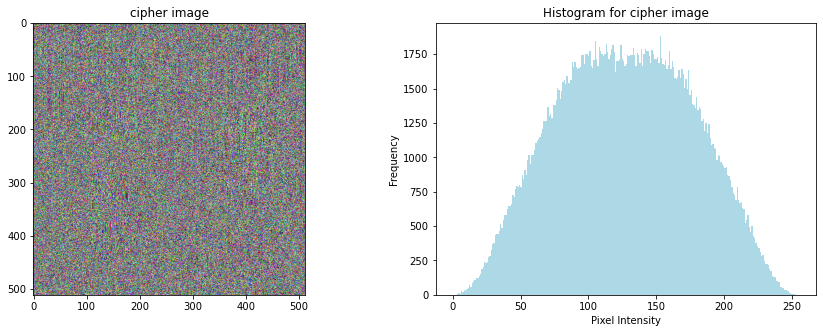

In [129]:
img = cv2.imread('F:/Thesis/cipher_wall.png')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(encrypted_lena_img)
axs[0].set_title('cipher image')
axs[1].hist(gray.ravel(), bins=256, range=(0, 255), color='lightblue')
axs[1].set_title("Histogram for cipher image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

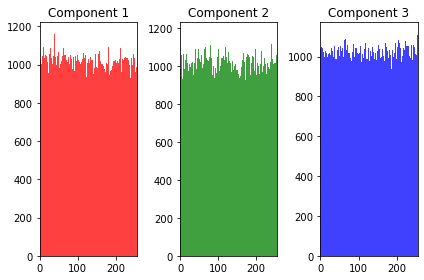

In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image in RGB format
img = cv2.imread('F:/Thesis/cipher_wall.png', cv2.IMREAD_COLOR)

# Split the image into its color components (red, green, blue)
components = cv2.split(img)

# Plot histograms of each color component with the color of each histogram being similar to the color of its component
colors = ['red', 'green', 'blue']
for i, component in enumerate(components):
    plt.subplot(1, len(components), i + 1)
    plt.hist(component.ravel(), bins=256, range=(0, 255), color=colors[i], alpha=.75)
    plt.title('Component {0}'.format(i + 1))
    plt.xlim([0, 255])
    plt.tight_layout()

plt.show()


In [131]:
import cv2
import numpy as np
import math

# Load the image
img = cv2.imread('F:/Thesis/cipher_wall.png', cv2.IMREAD_COLOR)

# Calculate the histogram of the image
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Normalize the histogram
hist = hist / np.sum(hist)

# Calculate the entropy of the image
entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))

print("The entropy of the image is:", entropy)


The entropy of the image is: 7.9990726


In [136]:
import cv2
import numpy as np
from scipy.signal import correlate2d

# Load the image and convert to grayscale
img = cv2.imread('F:/Thesis/cipher_wall.png', cv2.IMREAD_GRAYSCALE)

# Define the kernel for horizontal correlation
kernel = np.array([[0, 1, -1]])
# kernel = np.array([[0], [1], [-1]])
# Calculate the correlation
corr = correlate2d(img, kernel, mode='valid')

# Normalize the output to be in the range [0, 255]
corr_norm = cv2.normalize(corr, None, 0, 255, cv2.NORM_MINMAX)

# Convert the output to an 8-bit integer
corr_int = cv2.convertScaleAbs(corr_norm)

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(img[:, :-2].flatten(), corr.flatten())[0, 1]

# Display the results
cv2.imshow('Original', img)
cv2.imshow('Horizontal Correlation', corr_int)
print(f'Correlation Coefficient: {corr_coeff}')
cv2.waitKey(0)
cv2.destroyAllWindows()


Correlation Coefficient: -0.00011420753104047663


In [133]:
import numpy as np
import skimage.io as io

# Load the two cipher images
C1 = io.imread('F:/Thesis/cipher_wall.png')
C2 = io.imread('F:/Thesis/cipher_modified_wall.png')

def uaci(img1, img2):
    height, width, channels = img1.shape
    value = 0
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                value += abs(int(img1[y, x, c]) - int(img2[y, x, c]))
    value = value * 100 / (width * height * 255 * channels)
    return value

# Calculate the UACI between the two cipher images
res = uaci(C1, C2)
print('UACI: ', res)


UACI:  33.31506417467703


In [134]:
c1 = io.imread('F:/Thesis/cipher_wall.png')
c2 = io.imread('F:/Thesis/cipher_modified_wall.png')
def npcr(img1, img2):
    height, width, channels = img1.shape
    value = 0
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                if int(img1[y, x, c]) != int(img2[y, x, c]):
                    value += 1
    value = value * 100 / (width * height * channels)
    return value

# Calculate the NPCR between the two cipher images
res = npcr(c1, c2)
print('NPCR: ', res)


NPCR:  98.59110514322917


In [135]:
                    #encryption part end
#------------------------------------------------------->